In [256]:
import gym
import mdptoolbox
from hiive.mdptoolbox.mdp import QLearning
from gym.envs.toy_text.frozen_lake import generate_random_map
import numpy as np
import matplotlib.pyplot as plt
from Agents import RandomAgent
from Agents import ValueIterAgent
import random
random.seed(0)
np.random.seed(0)

random_map = generate_random_map(size=23, p=0.8)
env = gym.make('FrozenLake-v0', desc=random_map)
env.render()


SFFFFFFFFFHFFFFHFFHFFFF
FFFFFFFHFFHHFHFHHHHFFFH
FFHFHFFFFFFFFFHFHFFFHFF
FHFFFFFFFFFFFFHFFFFFFHF
FFHHHFFFFFFFFFHFFFFHHHF
FFFFHFFFFFHFFFFHFHFFFFF
FFFFFFFHFFFFFFFFFFFFFHF
HFFFFFFFFHFFFFFFFFFHFFF
FFFFFFFFHFHFHFHFFFFFFFF
FFFFFHFFFFHFHFFFHFFHFFF
FHFFFHHHFHFFFFFHFFFFHFF
HHFFFFFFFFFFHHFFFFFFFFH
FHFHFFFFHFFFFFFFFFFFHFH
HFFFFFHFHFFFFFFHFHFFFFH
FFFHFFFFFHHFFFHFFHFHFFF
FFFFHFFFFFFFFFFHFFFFFFH
FFFHFFFHHFFFFHFHFHFFFFF
FFFHFHFFFFHFFFFHFFFHFFF
FFFFFFHFHFFFFFFHHFFFFFF
FFFHFFHFHFFFFFHHFFHFHHF
FFFFFFFFHFFFFFFFHFFFHFF
FFFFFFFFFFFHFHFFHFFFHHF
FFFFFFFFFFFFHFHFFFFHFFG


In [257]:
take = env.render(mode='ansi')
temp = list(take)
world = []
for each in temp:
    for k in ['S', 'F', 'H', 'G']:
        if each == k:
            world.append(each)
#print(world)
size = len(world)
print('Total states: ', size)

Total states:  529


In [258]:
P = np.zeros((4, size, size))
for action in range(4):
    for state in range(size):
        if state == size-1:
            P[action][state][state] = 1.0
        elif world[state] == 'H':
            P[action][state][state] = 1.0
        else:
            for prob in env.P[state][action]:
                P[action][state][prob[1]] += (1/3.0)

In [259]:
#print(P)

In [260]:
# REWARD
r_goal = 1
r_hole = -1
r_other = 0
R = np.zeros((size, 4))
for s in range(size):
    if world[s] == 'H':
        for a in range(4):
            R[s][a] = r_hole
    elif world[s] == 'G':
        for a in range(4):
            R[s][a] = r_goal
    else:
        for a in range(4):
            R[s][a] = r_other
    

In [261]:
#print(R)

In [262]:
# Value Iteration

vi = mdptoolbox.mdp.ValueIteration(P, R, 0.8) #discount
#vi.setVerbose()
vi.run()
print(vi.policy)
print('Iterations needed: ', vi.iter)
print('Time needed: ', vi.time)

(3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 3, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 0, 0, 0, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 3, 3, 3, 3, 3, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 1, 3, 2, 2, 3, 3, 3, 3, 0, 0, 2, 3, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 2, 0, 0, 0, 2, 3, 0, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 0, 0, 0, 2, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 

In [263]:
# Policy Iteration

pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.9, max_iter=1000) #discount
#pi.setVerbose()
pi.run()
print(pi.policy)
print('Iterations needed: ', pi.iter)
print('Time needed: ', pi.time)
error = np.mean(np.array(vi.policy) != np.array(pi.policy))
print('Error with optimal VI policy: ', error)

(0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 3, 3, 3, 0, 0, 2, 3, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 0, 0, 0, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 3, 3, 3, 3, 3, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 0, 0, 2, 3, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 3, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 1, 1, 1, 3, 0, 0, 1, 2, 0, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0, 0, 2, 3, 2, 0, 0, 3, 0, 0, 0, 2, 3, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 

In [265]:
# Q-learning

ql = QLearning(P, R, 0.95, alpha=0.1, alpha_decay=0.99, alpha_min=0.005,
                 epsilon=1.0, epsilon_min=0.15, epsilon_decay=0.999,
                 n_iter=100000, skip_check=False, iter_callback=None,
                 run_stat_frequency=None) #discount
ql.run()
print(ql.policy)
#print(ql.mean_descepancy)
print('Time needed: ', ql.time)
error = np.mean(np.array(vi.policy) != np.array(ql.policy))
print('Error with optimal VI policy: ', error)

(0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 3, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 2, 0, 2, 3, 0, 0, 2, 0, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 1, 3, 1, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 3, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 3, 1, 2, 1, 2, 0, 0, 3, 0, 3, 2, 2, 1, 1, 3, 0, 3, 1, 1, 1, 1, 0, 0, 3, 2, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 2, 0, 3, 0, 2, 2, 3, 0, 0, 1, 2, 0, 0, 3, 3, 3, 3, 2, 0, 3, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 1, 0, 0, 3, 2, 0, 3, 1, 1, 3, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 2, 0, 2, 3, 2, 1, 1, 1, 3, 1, 2, 0, 1, 3, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 3, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 3, 0, 0, 3, 2, 0, 2, 1, 1, 2, 2, 0, 3, 2, 1, 1, 3, 1, 0, 0, 0, 1, 3, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0, 

In [275]:
all_error = []
all_time = []
X = [0.2, 0.25, 0.3, 0.35, 0.4]
for n in X:
    ql = QLearning(P, R, 0.9, alpha=0.1, alpha_decay=0.99, alpha_min=0.0005,
                     epsilon=1, epsilon_min=n, epsilon_decay=0.999,
                     n_iter=30000, skip_check=False, iter_callback=None,
                     run_stat_frequency=None) #discount
    ql.run()
    #print(ql.policy)
    #print(ql.V)
    print('Time needed: ', ql.time)
    error = np.mean(np.array(vi.policy) != np.array(ql.policy))
    print('Error with optimal VI policy: ', error)
    all_error.append(error)
    all_time.append(ql.time)
print('Done.')

Time needed:  4.722792387008667
Error with optimal VI policy:  0.6143667296786389
Time needed:  4.69487190246582
Error with optimal VI policy:  0.5954631379962193
Time needed:  4.5707573890686035
Error with optimal VI policy:  0.610586011342155
Time needed:  4.837579965591431
Error with optimal VI policy:  0.5973534971644613
Time needed:  4.630032062530518
Error with optimal VI policy:  0.6181474480151229
Done.


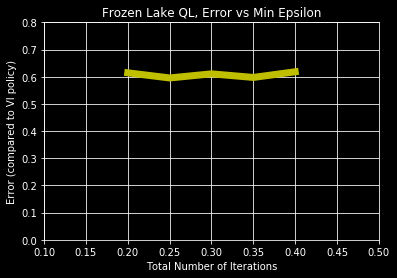

In [277]:
plt.style.use('dark_background')
ax=plt.axes()
ax.set(xlim=(0.1, 0.5), ylim=(0, 0.8))
ax.grid()
plt.title('Frozen Lake QL, Error vs Min Epsilon')
plt.xlabel('Total Number of Iterations')
plt.ylabel('Error (compared to VI policy)')
plt.plot(X, all_error, c = 'y', lw=7)
plt.savefig('Frozelake_QL_errorAndmEps.png')